# Library

In [1]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve

import numpy as np
import pandas as pd
import datetime
import itertools
# %matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from wordcloud import WordCloud

from keras.models import Sequential
from keras import layers
import matplotlib.pyplot as plt
plt.style.use('ggplot')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imanursar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\imanursar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Using TensorFlow backend.


# Function

In [2]:
def print_score (y_test,y_pred,time1,time2):
    print("comfusion matrix = ")
    print(confusion_matrix(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    
    print("")
    accuracy = accuracy_score(y_test, y_pred)
    print('accuracy_score = ', accuracy)

#In multilabel classification, 
#this function computes subset accuracy: the set of labels predicted for 
#a sample must exactly match the corresponding set of labels in y_true     

    print("")
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print ("precision score = ", precision)
    print ("recall score = ", recall)

#precision An interesting one to look at is the accuracy of the positive pre‐ dictions; this is called the precision of the classifier 
# recall, also called sensitivity or true positive rate (TPR): this is the ratio of positive instances that are correctly detected by the classifier
#precision = TP/TP + FP
#recall = TP/TP + FN
    
    print("")
    f1 = f1_score(y_test, y_pred)
    print ("F1 score = ", f1)
    
    print("")
    cr = classification_report(y_test,y_pred)
    print("classification_report")
    print(cr)
#The F1 score is the harmonic mean of precision and recall (Equation 3-3). 
#Whereas the regular mean treats all values equally, 
#the harmonic mean gives much more weight to low values.

    print("")
    print ("time span= ", time2 - time1)

In [3]:
def score (y_test,y_pred,time1,time2):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    time = time2 - time1
    return(cm,accuracy,precision,recall,f1,time)

In [4]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

# Load file

In [5]:
com_spam = pd.read_excel("Data_Scientist\Comment Spam.xls")

In [6]:
X = com_spam["Comment"]
y = com_spam["Class"]

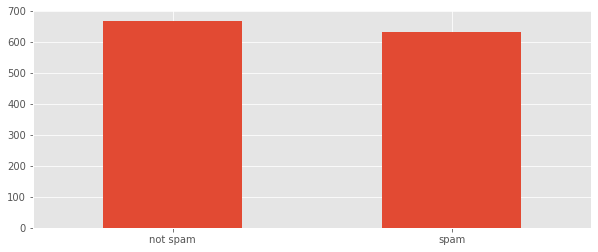

In [7]:
labels = ["not spam", "spam"]
xx = np.arange(2)
plt.figure(figsize=(10,4))
y.value_counts().plot(kind='bar')
plt.xticks(xx,labels,rotation=0)
plt.show()

# Text Preprocessing

In [8]:
documents = []

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # removing all non-word characters such as special characters, numbers, etc.
#     document = re.sub(r'\W', ' ', str(X[sen]))
    document = re.sub(r'\W', ' ', str(X[sen]), flags=re.I)
    document = re.sub(r'\d', ' ', str(X[sen]))
    document = re.sub(r"[,@\'?\.$%_*!^]", "", str(X[sen]), flags=re.I)
    
    # remove all the single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
#     # Removing prefixed 'b'
#     document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    # reduce the word into dictionary root form
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

# Converting Text to Numbers

## Bag of Words

In [9]:
# convert words to numbers using the bag of words approach, all the unique words in all the documents are converted into features
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X_BW = vectorizer.fit_transform(documents).toarray()

In [10]:
vectorizer.transform(documents)

<1300x378 sparse matrix of type '<class 'numpy.int64'>'
	with 7164 stored elements in Compressed Sparse Row format>

## TFIDF

In [11]:
tfidfconverter = TfidfTransformer()
X_TFIDF_1 = tfidfconverter.fit_transform(X_BW).toarray()

In [12]:
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
XTFIDF_2 = tfidfconverter.fit_transform(documents).toarray()

# Word Embeddings

In [13]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(documents)

X_WE = tokenizer.texts_to_sequences(documents)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(documents[2])
print(X_WE[2])

hi check out our awesome cover and say what you think
[166, 6, 5, 93, 167, 106, 3, 329, 130, 8, 183]


In [14]:
# padding
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_WE_p = pad_sequences(X_WE, padding='post', maxlen=maxlen)
X_WE_p

array([[   2,   16,   14, ...,    0,    0,    0],
       [   3,   69,  198, ...,    0,    0,    0],
       [ 166,    6,    5, ...,    0,    0,    0],
       ...,
       [ 964,   38,   17, ...,    0,    0,    0],
       [ 326,  465,    3, ...,    0,    0,    0],
       [3564,   14,  155, ...,    0,    0,    0]])

# Splitting data into train and validation (or test)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_WE_p, y, test_size=0.2, random_state=0)

# Deep Neural Networks

### training 1

In [18]:
#add layers one by one in order as follows
input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))

#overview of the model and the number of parameters available for training
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

#start training
history = model.fit(X_train, y_train,
                    epochs=40,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=15)

#evaluate the accuracy model
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 1,021
Trainable params: 1,021
Non-trainable params: 0
_________________________________________________________________
Train on 1040 samples, validate on 260 samples
Epoch 1/40
1040/1040 [==============================] - 0s 292us/step - loss: 0.7682 - accuracy: 0.4567 - val_loss: 0.7272 - val_accuracy: 0.4615
Epoch 2/40
1040/1040 [==============================] - 0s 209us/step - loss: 0.7199 - accuracy: 0.4875 - val_loss: 0.7086 - val_accuracy: 0.4577
Epoch 3/40
1040/1040 [==============================] - 0s 214us/step - loss: 0.6975 - accuracy: 0.5029 - val_loss: 0.6985 - val_accuracy: 0.4769
Epoch 4/40
1040/1040 [=======

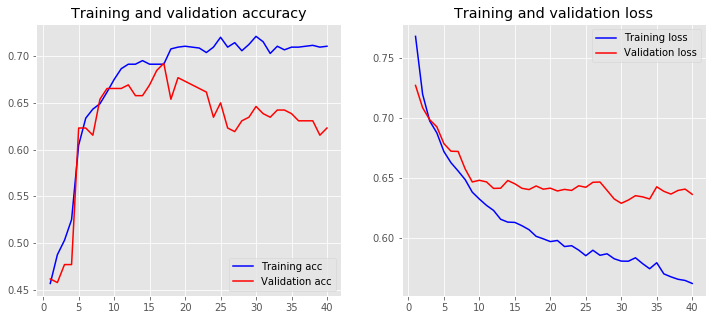

In [19]:
plot_history(history)

### training 2

In [20]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

#param = vocab_size * embedding_dim

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           178250    
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                50010     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 228,271
Trainable params: 228,271
Non-trainable params: 0
_________________________________________________________________


C:\Users\imanursar\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1040 samples, validate on 260 samples
Epoch 1/20
1040/1040 [==============================] - 0s 451us/step - loss: 0.6437 - accuracy: 0.6298 - val_loss: 0.5116 - val_accuracy: 0.7885
Epoch 2/20
1040/1040 [==============================] - 0s 340us/step - loss: 0.3709 - accuracy: 0.8865 - val_loss: 0.3300 - val_accuracy: 0.8846
Epoch 3/20
1040/1040 [==============================] - 0s 357us/step - loss: 0.2120 - accuracy: 0.9558 - val_loss: 0.2656 - val_accuracy: 0.9115
Epoch 4/20
1040/1040 [==============================] - 0s 296us/step - loss: 0.1340 - accuracy: 0.9798 - val_loss: 0.2392 - val_accuracy: 0.9154
Epoch 5/20
1040/1040 [==============================] - 0s 303us/step - loss: 0.0903 - accuracy: 0.9942 - val_loss: 0.2218 - val_accuracy: 0.9231
Epoch 6/20
1040/1040 [==============================] - 0s 318us/step - loss: 0.0646 - accuracy: 0.9952 - val_loss: 0.2161 - val_accuracy: 0.9269
Epoch 7/20
1040/1040 [==============================] - 0s 307us/step - loss:

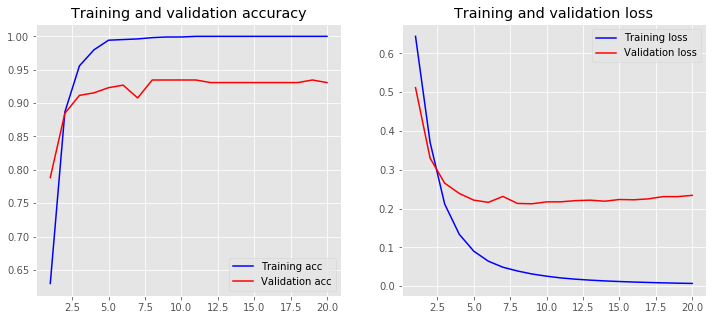

In [21]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

### training 3

In [58]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 100, 50)           178250    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 50)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 11        
Total params: 178,771
Trainable params: 178,771
Non-trainable params: 0
_________________________________________________________________


Train on 1040 samples, validate on 260 samples
Epoch 1/50
1040/1040 [==============================] - 1s 614us/step - loss: 0.6554 - accuracy: 0.7260 - val_loss: 0.5972 - val_accuracy: 0.8462
Epoch 2/50
1040/1040 [==============================] - 0s 282us/step - loss: 0.4443 - accuracy: 0.9173 - val_loss: 0.3280 - val_accuracy: 0.9231
Epoch 3/50
1040/1040 [==============================] - 0s 288us/step - loss: 0.2059 - accuracy: 0.9529 - val_loss: 0.1982 - val_accuracy: 0.9346
Epoch 4/50
1040/1040 [==============================] - 0s 280us/step - loss: 0.1089 - accuracy: 0.9712 - val_loss: 0.1627 - val_accuracy: 0.9462
Epoch 5/50
1040/1040 [==============================] - 0s 270us/step - loss: 0.0653 - accuracy: 0.9856 - val_loss: 0.1495 - val_accuracy: 0.9500
Epoch 6/50
1040/1040 [==============================] - 0s 275us/step - loss: 0.0413 - accuracy: 0.9923 - val_loss: 0.1460 - val_accuracy: 0.9462
Epoch 7/50
1040/1040 [==============================] - 0s 263us/step - loss:

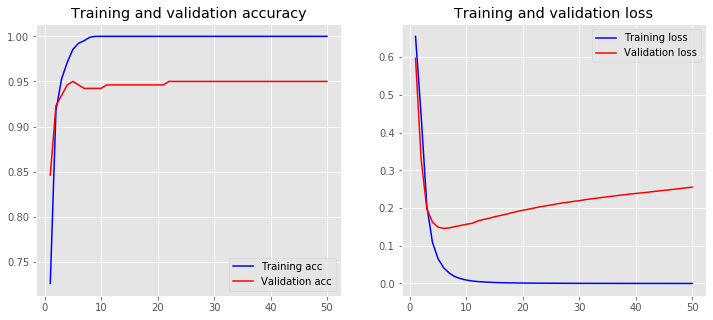

In [59]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

### training 4

### Glove

In [76]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [61]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix(
    'glove.6B.50d.txt',
    tokenizer.word_index, embedding_dim)

FileNotFoundError: [Errno 2] No such file or directory: 'data/glove_word_embeddings/glove.6B.50d.txt'

In [ ]:
#how many of the embedding vectors are nonzero
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

# This means  of the vocabulary is covered by the pretrained model, which is a good coverage of our vocabulary

In [ ]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=False))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

### training 5

In [ ]:
# Since the word embeddings are not additionally trained, it is expected to be lower. But let’s now see how this performs if we allow the embedding to be trained by using trainable=True

In [ ]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

# Convolutional Neural Networks (CNN)

In [64]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='sigmoid'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 100, 100)          356500    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 128)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 11        
Total params: 421,929
Trainable params: 421,929
Non-trainable params: 0
_________________________________________________________________


E:\program\python\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1040 samples, validate on 260 samples
Epoch 1/10
1040/1040 [==============================] - 1s 1ms/step - loss: 0.6233 - accuracy: 0.6779 - val_loss: 0.4850 - val_accuracy: 0.7923
Epoch 2/10
1040/1040 [==============================] - 1s 1ms/step - loss: 0.3281 - accuracy: 0.9019 - val_loss: 0.2622 - val_accuracy: 0.9269
Epoch 3/10
1040/1040 [==============================] - 1s 997us/step - loss: 0.1696 - accuracy: 0.9663 - val_loss: 0.1995 - val_accuracy: 0.9269
Epoch 4/10
1040/1040 [==============================] - 1s 1ms/step - loss: 0.1026 - accuracy: 0.9837 - val_loss: 0.1688 - val_accuracy: 0.9423
Epoch 5/10
1040/1040 [==============================] - 1s 1ms/step - loss: 0.0682 - accuracy: 0.9933 - val_loss: 0.1593 - val_accuracy: 0.9385
Epoch 6/10
1040/1040 [==============================] - 1s 1ms/step - loss: 0.0513 - accuracy: 0.9942 - val_loss: 0.1583 - val_accuracy: 0.9423
Epoch 7/10
1040/1040 [==============================] - 1s 1ms/step - loss: 0.0401 - ac

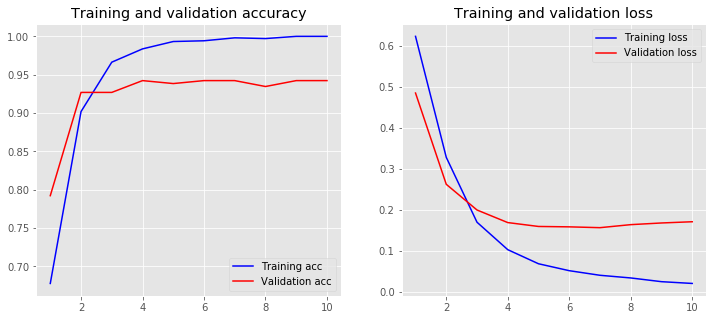

In [65]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

# Hyperparameters Optimization

In [66]:
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [67]:
param_grid = dict(num_filters=[32, 64, 128],
                  kernel_size=[3, 5, 7],
                  vocab_size=[5000], 
                  embedding_dim=[50],
                  maxlen=[100])

In [72]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Main settings
epochs = 20
embedding_dim = 50
maxlen = 100
output_file = 'output.txt'

# Parameter grid for grid search
param_grid = dict(num_filters=[32, 64, 128],
                  kernel_size=[3, 5, 7],
                  vocab_size=[vocab_size],
                  embedding_dim=[embedding_dim],
                  maxlen=[maxlen])
model = KerasClassifier(build_fn=create_model,
                        epochs=epochs, batch_size=10,
                        verbose=False)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                          cv=4, verbose=1, n_iter=5)
grid_result = grid.fit(X_train, y_train)

# Evaluate testing set
test_accuracy = grid.score(X_test, y_test)

# Save and evaluate results
prompt = input(f'finished; write to file and proceed? [y/n]')
with open(output_file, 'a') as f:
    s = ('Running {} data set\nBest Accuracy : '
         '{:.4f}\n{}\nTest Accuracy : {:.4f}\n\n')
    output_string = s.format(
        grid_result.best_score_,
        grid_result.best_params_,
        test_accuracy)
    print(output_string)
    f.write(output_string)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
E:\program\python\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
E:\program\python\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
E:\program\python\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
E:\program\python\Anac

NameError: name 'source' is not defined

# Visualizing data

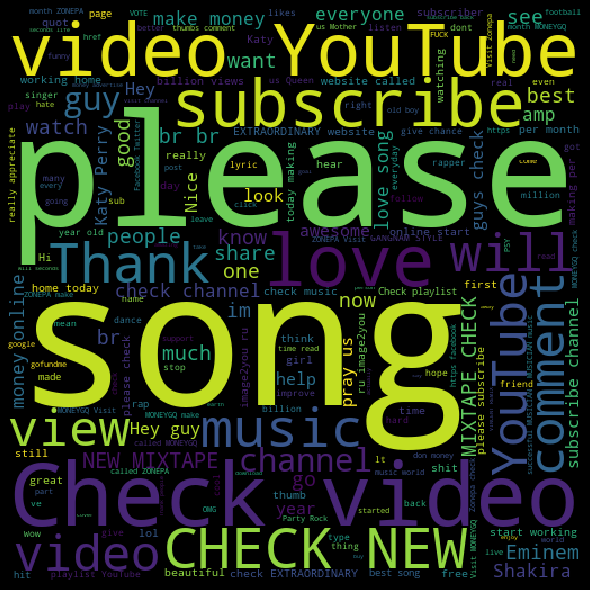

In [16]:
spam_words = ' '.join(list(X))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

# Saving and Loading the Model

## Save

In [17]:
with open('text_classifier', 'wb') as picklefile:
    pickle.dump(rf,picklefile)

## Load

In [18]:
with open('text_classifier', 'rb') as training_model:
    model = pickle.load(training_model)